<a href="https://colab.research.google.com/github/AhirtonLopes/BDBE2019_Demos/blob/master/Demo2_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo 2 - Convolutional Neural Networks usando Keras e CIFAR-10

> Indented block



### 1. Carregando a base CIFAR-10 (imagens rotuladas em macro categorias)

*** Mais informações em https://www.cs.toronto.edu/~kriz/cifar.html ***

In [0]:
import time
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator 
from keras import regularizers

Using TensorFlow backend.


In [0]:
#carregando o dataset pré-embaralhado de treinamento bem como os dados de teste
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train_ori = x_train
y_train_ori = y_train
x_test_ori = x_test
y_test_ori = y_test

170500096/170498071 [==============================] - 7s 0us/step


### 2. Visualizando as primeiras 24 imagens do dataset de treinamento

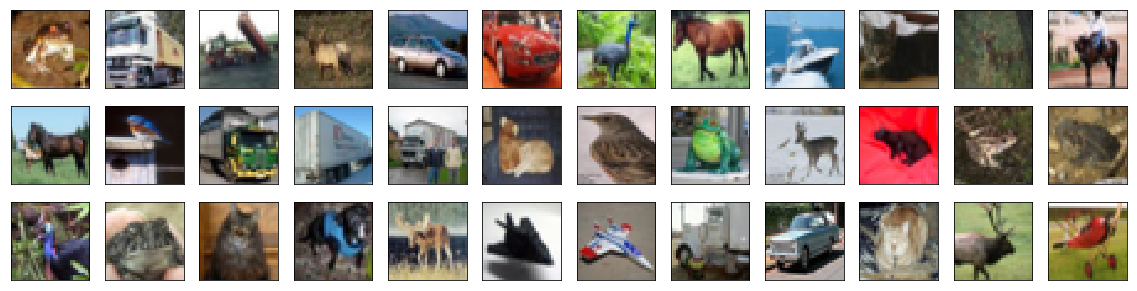

In [0]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [0]:
# redimensionamento [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

In [0]:
# "one-hot encode" aplicado aos rótulos
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# dividindo dataset de treinamento em treinamento, teste e validação
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# impressão da forma do conjunto de treino
print('x_train shape:', x_train.shape)

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

* 3 camadas convolucionais de tamanho progressivamente crescente
* Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
* Uma camada do tipo totalmente conectada de 100 neurônios
* Últimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
* "Dropout" de 0,2-0,3

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Modelo original passado no exercício pelo professor
def cria_modelo_ori(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 
  
  
    
# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/


### Cria o modelo e roda o teste

In [0]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']

model = cria_modelo_ori(filtros,funcoes)
print(model.summary())



hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 4, 4, 128)         0         
__________

O melhor resultado obtido foi de <b>72,32%</b> de acurácia

### Teste 1 - Aumentar a quantidade de épocas no treinamento

In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_ori(filtros,funcoes)

# Época alterada de 15 para 30 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 4s - loss: 1.7362 - acc: 0.3714 - val_loss: 1.3829 - val_acc: 0.5020

Epoch 00001: val_loss did not improve from 0.79649
Epoch 2/30
 - 4s - loss: 1.3798 - acc: 0.5062 - val_loss: 1.2365 - val_acc: 0.5698

Epoch 00002: val_loss did not improve from 0.79649
Epoch 3/30
 - 4s - loss: 1.2260 - acc: 0.5671 - val_loss: 1.6126 - val_acc: 0.4622

Epoch 00003: val_loss did not improve from 0.79649
Epoch 4/30
 - 4s - loss: 1.1175 - acc: 0.6064 - val_loss: 1.0527 - val_acc: 0.6192

Epoch 00004: val_loss did not improve from 0.79649
Epoch 5/30
 - 4s - loss: 1.0468 - acc: 0.6334 - val_loss: 1.0949 - val_acc: 0.6176

Epoch 00005: val_loss did not improve from 0.79649
Epoch 6/30
 - 4s - loss: 0.9944 - acc: 0.6522 - val_loss: 1.1941 - val_acc: 0.5868

Epoch 00006: val_loss did not improve from 0.79649
Epoch 7/30
 - 4s - loss: 0.9534 - acc: 0.6684 - val_loss: 0.8870 - val_acc: 0.6904

Epoch 00007: val_loss did not improve from 0.79649
Epoch 

Ainda que se dobre o quantidade de épocas o resultado permanece quase o mesmo, com uma acurácia de <b>73,28%</b>. Deste modo, a melhora da performance não parece ser apenas uma questão de treinamento.

### Teste 2 - Alterar as funções de ativação  para sigmóide

In [0]:
filtros = [32,64,128]
funcoes = ['sigmoid','sigmoid','sigmoid']
model = cria_modelo_ori(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 4s - loss: 2.3113 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1038

Epoch 00001: val_loss did not improve from 0.79464
Epoch 2/15
 - 4s - loss: 2.3038 - acc: 0.1005 - val_loss: 2.3034 - val_acc: 0.1038

Epoch 00002: val_loss did not improve from 0.79464
Epoch 3/15
 - 4s - loss: 2.3032 - acc: 0.0982 - val_loss: 2.3028 - val_acc: 0.0920

Epoch 00003: val_loss did not improve from 0.79464
Epoch 4/15
 - 4s - loss: 2.3029 - acc: 0.0995 - val_loss: 2.3025 - val_acc: 0.1040

Epoch 00004: val_loss did not improve from 0.79464
Epoch 5/15
 - 4s - loss: 2.3019 - acc: 0.0984 - val_loss: 2.2809 - val_acc: 0.1790

Epoch 00005: val_loss did not improve from 0.79464
Epoch 6/15
 - 4s - loss: 2.1355 - acc: 0.1987 - val_loss: 2.0129 - val_acc: 0.2582

Epoch 00006: val_loss did not improve from 0.79464
Epoch 7/15
 - 4s - loss: 2.0240 - acc: 0.2507 - val_loss: 1.9677 - val_acc: 0.2634

Epoch 00007: val_loss did not improve from 0.79464
Epoch 

Alterando a função de ativação nas camadas convolucionais para sigmóide, o resultado fica bem pior, caindo para uma acurácia de <b>44,82%</b>

### Teste 3 - Retirando camada totalmente conectada (Dense) no final da rede

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_sem_dense(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 
  
  
    
# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/


In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_sem_dense(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 8s - loss: 1.6569 - acc: 0.4052 - val_loss: 1.5234 - val_acc: 0.4494

Epoch 00001: val_loss did not improve from 0.82872
Epoch 2/15
 - 5s - loss: 1.3220 - acc: 0.5340 - val_loss: 1.2265 - val_acc: 0.5786

Epoch 00002: val_loss did not improve from 0.82872
Epoch 3/15
 - 5s - loss: 1.1756 - acc: 0.5891 - val_loss: 1.2259 - val_acc: 0.5766

Epoch 00003: val_loss did not improve from 0.82872
Epoch 4/15
 - 4s - loss: 1.0740 - acc: 0.6236 - val_loss: 1.1747 - val_acc: 0.5822

Epoch 00004: val_loss did not improve from 0.82872
Epoch 5/15
 - 4s - loss: 0.9936 - acc: 0.6530 - val_loss: 1.0902 - val_acc: 0.6150

Epoch 00005: val_loss did not improve from 0.82872
Epoch 6/15
 - 4s - loss: 0.9381 - acc: 0.6725 - val_loss: 1.1495 - val_acc: 0.5824

Epoch 00006: val_loss did not improve from 0.82872
Epoch 7/15
 - 4s - loss: 0.8920 - acc: 0.6898 - val_loss: 1.0370 - val_acc: 0.6282

Epoch 00007: val_loss did not improve from 0.82872
Epoch 

A estratégia de retirar a camada extra totalmente conectada (Dense) funcionou. A acurácia aumentou para <b>73,50%</b>

### Teste 4 - Utilizando camadas convolucionais duplas

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_camada_dupla(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    model.add(Conv2D(filters=filtro, kernel_size=2, padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 
  
  
    
# tentem com outras funções de ativação (como visto em nossa Aula 3)
# mais informações em https://keras.io/activations/


In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_camada_dupla(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 10s - loss: 1.7263 - acc: 0.3691 - val_loss: 1.6179 - val_acc: 0.4044

Epoch 00001: val_loss did not improve from 0.78013
Epoch 2/15
 - 6s - loss: 1.3345 - acc: 0.5204 - val_loss: 1.1924 - val_acc: 0.5874

Epoch 00002: val_loss did not improve from 0.78013
Epoch 3/15
 - 6s - loss: 1.1470 - acc: 0.5944 - val_loss: 1.0567 - val_acc: 0.6250

Epoch 00003: val_loss did not improve from 0.78013
Epoch 4/15
 - 6s - loss: 0.9957 - acc: 0.6493 - val_loss: 1.2123 - val_acc: 0.5762

Epoch 00004: val_loss did not improve from 0.78013
Epoch 5/15
 - 6s - loss: 0.8895 - acc: 0.6891 - val_loss: 1.0941 - val_acc: 0.6202

Epoch 00005: val_loss did not improve from 0.78013
Epoch 6/15
 - 6s - loss: 0.8060 - acc: 0.7164 - val_loss: 1.1953 - val_acc: 0.6060

Epoch 00006: val_loss did not improve from 0.78013
Epoch 7/15
 - 7s - loss: 0.7427 - acc: 0.7425 - val_loss: 1.2325 - val_acc: 0.6068

Epoch 00007: val_loss did not improve from 0.78013
Epoch

O resultado foi melhor, atingiu <b>75,96%</b>

### Teste 5 - Utilizando kernel de dimensão 3x3 na rede 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_kernel(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_kernel(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 11s - loss: 1.7522 - acc: 0.3620 - val_loss: 1.7165 - val_acc: 0.4006

Epoch 00001: val_loss did not improve from 0.63207
Epoch 2/15
 - 7s - loss: 1.2420 - acc: 0.5587 - val_loss: 1.0547 - val_acc: 0.6298

Epoch 00002: val_loss did not improve from 0.63207
Epoch 3/15
 - 7s - loss: 0.9809 - acc: 0.6552 - val_loss: 1.1741 - val_acc: 0.5936

Epoch 00003: val_loss did not improve from 0.63207
Epoch 4/15
 - 7s - loss: 0.8237 - acc: 0.7132 - val_loss: 0.9892 - val_acc: 0.6510

Epoch 00004: val_loss did not improve from 0.63207
Epoch 5/15
 - 7s - loss: 0.7231 - acc: 0.7489 - val_loss: 0.9114 - val_acc: 0.6856

Epoch 00005: val_loss did not improve from 0.63207
Epoch 6/15
 - 7s - loss: 0.6394 - acc: 0.7771 - val_loss: 0.7775 - val_acc: 0.7420

Epoch 00006: val_loss did not improve from 0.63207
Epoch 7/15
 - 7s - loss: 0.5723 - acc: 0.8030 - val_loss: 0.8630 - val_acc: 0.7064

Epoch 00007: val_loss did not improve from 0.63207
Epoch

A estratégia também surtiu efeito. A nova acurácia agora é de <b>78,92%</b>

### Teste 6 - Incluindo Dropout nas camadas de "pooling"

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_mais_dropout(filtros,funcoes):
 

    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao, 
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_mais_dropout(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 11s - loss: 1.7661 - acc: 0.3583 - val_loss: 1.6771 - val_acc: 0.3794

Epoch 00001: val_loss did not improve from 0.63207
Epoch 2/15
 - 7s - loss: 1.2760 - acc: 0.5444 - val_loss: 1.1011 - val_acc: 0.6072

Epoch 00002: val_loss did not improve from 0.63207
Epoch 3/15
 - 7s - loss: 1.0499 - acc: 0.6292 - val_loss: 1.0966 - val_acc: 0.6116

Epoch 00003: val_loss did not improve from 0.63207
Epoch 4/15
 - 7s - loss: 0.9095 - acc: 0.6805 - val_loss: 0.8286 - val_acc: 0.7158

Epoch 00004: val_loss did not improve from 0.63207
Epoch 5/15
 - 7s - loss: 0.8245 - acc: 0.7122 - val_loss: 0.9226 - val_acc: 0.6946

Epoch 00005: val_loss did not improve from 0.63207
Epoch 6/15
 - 7s - loss: 0.7513 - acc: 0.7382 - val_loss: 0.7205 - val_acc: 0.7528

Epoch 00006: val_loss did not improve from 0.63207
Epoch 7/15
 - 7s - loss: 0.7060 - acc: 0.7566 - val_loss: 0.7197 - val_acc: 0.7502

Epoch 00007: val_loss did not improve from 0.63207
Epoch

Resultado muito bom. A acurácia atingiu <b>80,38%</b>

### Teste 7 - Acrescentando regularizadores (L2) à rede

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_L2(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))

    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_L2(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=15,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/15
 - 12s - loss: 1.7785 - acc: 0.3549 - val_loss: 1.6705 - val_acc: 0.4374

Epoch 00001: val_loss did not improve from 0.59281
Epoch 2/15
 - 7s - loss: 1.3346 - acc: 0.5345 - val_loss: 1.4367 - val_acc: 0.5034

Epoch 00002: val_loss did not improve from 0.59281
Epoch 3/15
 - 7s - loss: 1.1454 - acc: 0.6096 - val_loss: 1.1265 - val_acc: 0.6208

Epoch 00003: val_loss did not improve from 0.59281
Epoch 4/15
 - 7s - loss: 1.0316 - acc: 0.6522 - val_loss: 1.0043 - val_acc: 0.6588

Epoch 00004: val_loss did not improve from 0.59281
Epoch 5/15
 - 7s - loss: 0.9540 - acc: 0.6850 - val_loss: 0.9848 - val_acc: 0.6858

Epoch 00005: val_loss did not improve from 0.59281
Epoch 6/15
 - 7s - loss: 0.8892 - acc: 0.7104 - val_loss: 0.9118 - val_acc: 0.7152

Epoch 00006: val_loss did not improve from 0.59281
Epoch 7/15
 - 7s - loss: 0.8413 - acc: 0.7301 - val_loss: 0.8944 - val_acc: 0.7114

Epoch 00007: val_loss did not improve from 0.59281
Epoch

Apesar de não ter havido uma melhora no indicador (acurácia), há uma grande oscilação nas perdas da amostra de validação. Será realizado um novo teste com uma quantidade maior de épocas para identificar essa tendência. 

### Teste 8 - Novo teste com regularizador L2 e uma quantidade maior de épocas

In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_L2(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 12s - loss: 1.7761 - acc: 0.3574 - val_loss: 1.6692 - val_acc: 0.4050

Epoch 00001: val_loss did not improve from 0.59281
Epoch 2/30
 - 7s - loss: 1.3257 - acc: 0.5385 - val_loss: 1.4672 - val_acc: 0.4876

Epoch 00002: val_loss did not improve from 0.59281
Epoch 3/30
 - 7s - loss: 1.1287 - acc: 0.6151 - val_loss: 1.2135 - val_acc: 0.5926

Epoch 00003: val_loss did not improve from 0.59281
Epoch 4/30
 - 7s - loss: 1.0191 - acc: 0.6602 - val_loss: 1.1401 - val_acc: 0.6076

Epoch 00004: val_loss did not improve from 0.59281
Epoch 5/30
 - 8s - loss: 0.9432 - acc: 0.6887 - val_loss: 0.9717 - val_acc: 0.6772

Epoch 00005: val_loss did not improve from 0.59281
Epoch 6/30
 - 7s - loss: 0.8852 - acc: 0.7116 - val_loss: 0.8726 - val_acc: 0.7198

Epoch 00006: val_loss did not improve from 0.59281
Epoch 7/30
 - 7s - loss: 0.8364 - acc: 0.7329 - val_loss: 0.8779 - val_acc: 0.7164

Epoch 00007: val_loss did not improve from 0.59281
Epoch

Os resultados melhoraram, foi alcançada uma acurácia de <b>81,80%</b> na amostra de validação

### Teste 9 - Utilização de Normalização em Batch (BatchNormalization) para acelerar o aprendizado

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_batch(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])       
    return model 


In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_batch(filtros,funcoes)

 
hist = model.fit(x_train, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 16s - loss: 1.7393 - acc: 0.4857 - val_loss: 1.5120 - val_acc: 0.5194

Epoch 00001: val_loss did not improve from 0.59281
Epoch 2/30
 - 10s - loss: 1.2331 - acc: 0.6496 - val_loss: 1.3200 - val_acc: 0.6172

Epoch 00002: val_loss did not improve from 0.59281
Epoch 3/30
 - 10s - loss: 1.0462 - acc: 0.7053 - val_loss: 1.4761 - val_acc: 0.5662

Epoch 00003: val_loss did not improve from 0.59281
Epoch 4/30
 - 10s - loss: 1.0340 - acc: 0.7278 - val_loss: 3.6422 - val_acc: 0.5642

Epoch 00004: val_loss did not improve from 0.59281
Epoch 5/30
 - 10s - loss: 1.0268 - acc: 0.7430 - val_loss: 1.7535 - val_acc: 0.5492

Epoch 00005: val_loss did not improve from 0.59281
Epoch 6/30
 - 10s - loss: 0.9503 - acc: 0.7624 - val_loss: 1.6963 - val_acc: 0.5202

Epoch 00006: val_loss did not improve from 0.59281
Epoch 7/30
 - 10s - loss: 0.8969 - acc: 0.7776 - val_loss: 1.2251 - val_acc: 0.6906

Epoch 00007: val_loss did not improve from 0.59281

Resultado muito bom. Acurácia subiu para <b>83,10%</b> na amostra de validação

### Teste 9 - Estandarização dos dados para acelerar o Learning Rate em conjunto com BatchNormalization

In [0]:
#estandarização dos dados
media = np.mean(x_train,axis=(0,1,2,3))
desv_padrao = np.std(x_train,axis=(0,1,2,3))
x_train_norm = (x_train-media)/(desv_padrao+1e-7)
x_valid_norm = (x_valid-media)/(desv_padrao+1e-7)
x_test_norm = (x_test-media)/(desv_padrao+1e-7)

In [0]:
filtros = [32,64,128]
funcoes = ['relu','relu','relu']
model = cria_modelo_com_batch(filtros,funcoes)

 
hist = model.fit(x_train_norm, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 15s - loss: 1.8741 - acc: 0.4535 - val_loss: 2.6070 - val_acc: 0.5118

Epoch 00001: val_loss did not improve from 0.59281
Epoch 2/30
 - 9s - loss: 1.2983 - acc: 0.6183 - val_loss: 1.5630 - val_acc: 0.6048

Epoch 00002: val_loss did not improve from 0.59281
Epoch 3/30
 - 10s - loss: 1.0990 - acc: 0.6793 - val_loss: 1.2737 - val_acc: 0.6756

Epoch 00003: val_loss did not improve from 0.59281
Epoch 4/30
 - 9s - loss: 0.9759 - acc: 0.7186 - val_loss: 0.9301 - val_acc: 0.7150

Epoch 00004: val_loss did not improve from 0.59281
Epoch 5/30
 - 9s - loss: 0.8758 - acc: 0.7480 - val_loss: 0.8340 - val_acc: 0.7462

Epoch 00005: val_loss did not improve from 0.59281
Epoch 6/30
 - 9s - loss: 0.8386 - acc: 0.7665 - val_loss: 0.9110 - val_acc: 0.7346

Epoch 00006: val_loss did not improve from 0.59281
Epoch 7/30
 - 9s - loss: 0.8005 - acc: 0.7810 - val_loss: 0.7758 - val_acc: 0.7794

Epoch 00007: val_loss did not improve from 0.59281
Epoc

A transformação melhorou o indicador. Acurácia obtida = <b>85,20%</b>

### Teste 10 - Utilizar a função de ativação ELU (Exponential Linear Unit)

In [0]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']

model = cria_modelo_com_batch(filtros,funcoes)

#estandarização dos dados
 
hist = model.fit(x_train_norm, y_train, batch_size=64, epochs=30,
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 16s - loss: 1.8001 - acc: 0.4695 - val_loss: 1.4078 - val_acc: 0.5516

Epoch 00001: val_loss did not improve from 0.59281
Epoch 2/30
 - 10s - loss: 1.1263 - acc: 0.6449 - val_loss: 1.3495 - val_acc: 0.5986

Epoch 00002: val_loss did not improve from 0.59281
Epoch 3/30
 - 10s - loss: 0.9511 - acc: 0.7017 - val_loss: 0.9944 - val_acc: 0.6908

Epoch 00003: val_loss did not improve from 0.59281
Epoch 4/30
 - 10s - loss: 0.8449 - acc: 0.7397 - val_loss: 0.8646 - val_acc: 0.7374

Epoch 00004: val_loss did not improve from 0.59281
Epoch 5/30
 - 10s - loss: 0.7713 - acc: 0.7673 - val_loss: 0.7436 - val_acc: 0.7854

Epoch 00005: val_loss did not improve from 0.59281
Epoch 6/30
 - 10s - loss: 0.7106 - acc: 0.7892 - val_loss: 0.7570 - val_acc: 0.7784

Epoch 00006: val_loss did not improve from 0.59281
Epoch 7/30
 - 10s - loss: 0.6690 - acc: 0.8074 - val_loss: 0.7374 - val_acc: 0.7960

Epoch 00007: val_loss did not improve from 0.59281

O resultado foi um pouco melhor. A acurácia agora está em <b>85,68%</b>

### Teste 11 - Utilização de Data Augmentation para salientar características da imagem e facilitar detecção de característcas

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_norm)

In [0]:


filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_batch(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_norm.shape[0]//64),
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 22s - loss: 1.9492 - acc: 0.4103 - val_loss: 1.4930 - val_acc: 0.5294

Epoch 00001: val_loss improved from inf to 1.49302, saving model to model.weights.best.hdf5
Epoch 2/30
 - 20s - loss: 1.3516 - acc: 0.5615 - val_loss: 1.2342 - val_acc: 0.6156

Epoch 00002: val_loss improved from 1.49302 to 1.23425, saving model to model.weights.best.hdf5
Epoch 3/30
 - 20s - loss: 1.1386 - acc: 0.6329 - val_loss: 1.0920 - val_acc: 0.6724

Epoch 00003: val_loss improved from 1.23425 to 1.09202, saving model to model.weights.best.hdf5
Epoch 4/30
 - 20s - loss: 1.0149 - acc: 0.6756 - val_loss: 0.9175 - val_acc: 0.7170

Epoch 00004: val_loss improved from 1.09202 to 0.91748, saving model to model.weights.best.hdf5
Epoch 5/30
 - 20s - loss: 0.9508 - acc: 0.701

A estratégia funcionou. Após as transformações nas imagens a acurácia atingiu o patamar de <b>85,70%</b> de acurácia na amostra de validação

### Teste 12 - Pametrizando o otimizador do modelo (rmsprop)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_opt(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, 
                  metrics=['accuracy'])       
    return model 


In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_norm)

In [0]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_opt(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_norm.shape[0]//64),
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/30
 - 21s - loss: 1.9298 - acc: 0.4203 - val_loss: 1.3623 - val_acc: 0.5796

Epoch 00001: val_loss did not improve from 0.57536
Epoch 2/30
 - 20s - loss: 1.3002 - acc: 0.5859 - val_loss: 1.1002 - val_acc: 0.6604

Epoch 00002: val_loss did not improve from 0.57536
Epoch 3/30
 - 21s - loss: 1.1033 - acc: 0.6512 - val_loss: 1.0612 - val_acc: 0.6842

Epoch 00003: val_loss did not improve from 0.57536
Epoch 4/30
 - 19s - loss: 1.0054 - acc: 0.6815 - val_loss: 0.9313 - val_acc: 0.7300

Epoch 00004: val_loss did not improve from 0.57536
Epoch 5/30
 - 20s - loss: 0.9305 - acc: 0.7095 - val_loss: 0.7925 - val_acc: 0.7642

Epoch 00005: val_loss did not improve from 0.57536
Epoch 6/30
 - 20s - loss: 0.8862 - acc: 0.7254 - val_loss: 0.7788 - val_acc: 0.7676

Epoch 00006: val_loss did not improve from 0.57536
Epoch 7/30
 - 21s - loss: 0.8424 - acc: 0.7443 - val_loss: 0.6714 - val_acc: 0.8074

Epoch 00007: val_loss did not improve from 0.57536
Epoch 8/30
 - 20s - loss: 0.8282 - acc: 0.7516 -

Melhorou ainda mais a acurácia atingindo <b>85,72%</b> na amostra de validação

### Teste 13 - Utilizando o otimizador Adam 

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def cria_modelo_com_adam(filtros,funcoes):
 
    param_l2 = 1e-4
    model = Sequential()
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)

    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),
                     activation=funcao,input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.2))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.3))
    filtro = filtros.pop(0) 
    funcao = funcoes.pop(0)    
    
    model.add(Conv2D(filtro,(3,3), padding='same',kernel_regularizer=regularizers.l2(param_l2), activation=funcao))
    model.add(BatchNormalization())
    model.add(Conv2D(filtro,(3,3), padding='same', kernel_regularizer=regularizers.l2(param_l2),activation=funcao))
    model.add(BatchNormalization())
    
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
    # mais informações em https://keras.io/losses/
    # mais informações em https://keras.io/optimizers/
    # mais informações em https://keras.io/metrics/
    
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])       
    return model 


In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_norm)

In [0]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_adam(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_norm.shape[0]//64),
          validation_data=(x_valid_norm, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Epoch 1/30
 - 22s - loss: 1.8825 - acc: 0.4150 - val_loss: 1.8882 - val_acc: 0.4570

Epoch 00001: val_loss did not improve from 0.56502
Epoch 2/30
 - 20s - loss: 1.3128 - acc: 0.5651 - val_loss: 1.1405 - val_acc: 0.6508

Epoch 00002: val_loss did not improve from 0.56502
Epoch 3/30
 - 20s - loss: 1.1079 - acc: 0.6325 - val_loss: 1.0333 - val_acc: 0.6816

Epoch 00003: val_loss did not improve from 0.56502
Epoch 4/30
 - 21s - loss: 1.0046 - acc: 0.6713 - val_loss: 0.9383 - val_acc: 0.7086

Epoch 00004: val_loss did not improve from 0.56502
Epoch 5/30
 - 20s - loss: 0.9239 - acc: 0.6989 - val_loss: 0.9289 - val_acc: 0.7182

Epoch 00005: val_loss did not improve from 0.56502
Epoch 6/30
 - 20s - loss: 0.8798 - acc: 0.7174 - val_loss: 0.7993 - val_acc: 0.7610

Epoch 00006: val_loss did not improve from 0.56502
Epoch 7/30
 - 20s - loss: 0.8368 - acc: 0.7373 - val_loss: 0.7290 - val_acc: 0.7822

Epoch 00007: val_loss did not improve from 0.56502
Epoch 8/30
 - 22s - loss: 0.8074 - acc: 0.7507 -

<br>
Esse teste não foi bem sucedido, o otimizador Adam não foi melhor que o rmsprop customizado. Atingiu <b>85,32%</b> de acurácia.Manteremos o otimizador anterior.
<br>

### Teste 14 - Diminuir a amostra de validação 

In [0]:
# dividindo dataset de treinamento em treinamento, teste e validação


# redimensionamento [0,255] --> [0,1]
x_train_teste14 = x_train_ori.astype('float32')/255
x_test_teste14 = x_test_ori.astype('float32')/255

num_classes = len(np.unique(y_train_ori))
y_train_teste14 = keras.utils.to_categorical(y_train_ori, num_classes)
y_test_teste14 = keras.utils.to_categorical(y_test_ori, num_classes)

(x_train_teste14, x_valid_teste14) = x_train_teste14[2000:], x_train_teste14[:2000]
(y_train_teste14, y_valid_teste14) = y_train_teste14[2000:], y_train_teste14[:2000]

# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train_teste14.shape[0], 'train samples')
print(x_test_teste14.shape[0], 'test samples')
print(x_valid_teste14.shape[0], 'validation samples')

48000 train samples
10000 test samples
2000 validation samples


In [0]:
#estandarização dos dados
media = np.mean(x_train_teste14,axis=(0,1,2,3))
desv_padrao = np.std(x_train_teste14,axis=(0,1,2,3))
x_train_teste14_norm = (x_train_teste14-media)/(desv_padrao+1e-7)
x_valid_teste14_norm = (x_valid_teste14-media)/(desv_padrao+1e-7)
x_test_teste14_norm = (x_test_teste14-media)/(desv_padrao+1e-7)

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_teste14_norm)

In [0]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_opt(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_teste14_norm, y_train_teste14, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_teste14_norm.shape[0]//64),
          validation_data=(x_valid_teste14_norm, y_valid_teste14), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 27s - loss: 1.9091 - acc: 0.4268 - val_loss: 1.3506 - val_acc: 0.5680

Epoch 00001: val_loss improved from inf to 1.35057, saving model to model.weights.best.hdf5
Epoch 2/30
 - 22s - loss: 1.3474 - acc: 0.5854 - val_loss: 1.2681 - val_acc: 0.6345

Epoch 00002: val_loss improved from 1.35057 to 1.26810, saving model to model.weights.best.hdf5
Epoch 3/30
 - 23s - loss: 1.1592 - acc: 0.6428 - val_loss: 1.0887 - val_acc: 0.6760

Epoch 00003: val_loss improved from 1.26810 to 1.08874, saving model to model.weights.best.hdf5
Epoch 4/30
 - 22s - loss: 1.0340 - acc: 0.6840 - val_loss: 0.8649 - val_acc: 0.7295

Epoch 00004: val_loss improved from 1.08874 to 0.86493, saving model to model.weights.best.hdf5
Epoch 5/30
 - 22s - loss: 0.9677 - acc: 0.7050 - val_loss: 0.8031 - val_acc: 0.7590

Epoch 00005: val_loss improved from 0.86493 to 0.80312, saving model to model.weights.best.hdf5
Epoch 6/30
 - 22s - loss: 0.9089 - acc: 0.7265 - va

O esperado seria um aumento da acurácia, pois há um aumento da amostra de treino que pode incoporar imagens que estivessem apenas contidas na amostra de validação. No entanto, a acurácia atingida com a nova amostra de validação foi de  <b>85,10%</b>

### Teste 15 - Aumento do treino e validação e diminuição da amostra de teste

In [0]:
# dividindo dataset de treinamento em treinamento, teste e validação


# redimensionamento [0,255] --> [0,1]
x_train_teste15 = x_train_ori.astype('float32')/255
x_test_teste15 = x_test_ori.astype('float32')/255

num_classes = len(np.unique(y_train_ori))
y_train_teste15 = keras.utils.to_categorical(y_train_ori, num_classes)
y_test_teste15 = keras.utils.to_categorical(y_test_ori, num_classes)

(x_test_extr_teste15, x_test_teste15) = x_test_teste15[5000:], x_train_teste15[:5000]
(y_test_extr_teste15, y_test_teste15) = y_test_teste15[5000:], y_test_teste15[:5000]


x_train_teste15 = np.concatenate((x_train_teste15,x_test_extr_teste15),axis=0)
y_train_teste15 = np.concatenate((y_train_teste15,y_test_extr_teste15),axis=0)

(x_train_teste15, x_valid_teste15) = x_train_teste15[7000:], x_train_teste15[:7000]
(y_train_teste15, y_valid_teste15) = y_train_teste15[7000:], y_train_teste15[:7000]


# impressão do número de imagens nos datasets de treinamento, teste e validação
print(x_train_teste15.shape[0], 'train samples')
print(x_test_teste15.shape[0], 'test samples')
print(x_valid_teste15.shape[0], 'validation samples')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
48000 train samples
5000 test samples
7000 validation samples


In [0]:
#estandarização dos dados
media = np.mean(x_train_teste15,axis=(0,1,2,3))
desv_padrao = np.std(x_train_teste15,axis=(0,1,2,3))
x_train_teste15_norm = (x_train_teste15-media)/(desv_padrao+1e-7)
x_valid_teste15_norm = (x_valid_teste15-media)/(desv_padrao+1e-7)
x_test_teste15_norm = (x_test_teste15-media)/(desv_padrao+1e-7)

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train_teste15_norm)

In [0]:
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_opt(filtros,funcoes)


hist = model.fit_generator(datagen.flow(x_train_teste15_norm, y_train_teste15, batch_size=64), epochs=30,
          steps_per_epoch=math.ceil(x_train_teste15_norm.shape[0]//64),
          validation_data=(x_valid_teste15_norm, y_valid_teste15), callbacks=[checkpointer], 
          verbose=2, shuffle=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 28s - loss: 1.9273 - acc: 0.4179 - val_loss: 1.2960 - val_acc: 0.5766

Epoch 00001: val_loss improved from inf to 1.29597, saving model to model.weights.best.hdf5
Epoch 2/30
 - 22s - loss: 1.2943 - acc: 0.5833 - val_loss: 1.2207 - val_acc: 0.6307

Epoch 00002: val_loss improved from 1.29597 to 1.22074, saving model to model.weights.best.hdf5
Epoch 3/30
 - 22s - loss: 1.0958 - acc: 0.6480 - val_loss: 1.0360 - val_acc: 0.6921

Epoch 00003: val_loss improved from 1.22074 to 1.03595, saving model to model.weights.best.hdf5
Epoch 4/30
 - 22s - loss: 0.9861 - acc: 0.6866 - val_loss: 0.9194 - val_acc: 0.7279

Epoch 00004: val_loss improved from 1.03595 to 0.91945, saving model to model.weights.best.hdf5
Epoch 5/30
 - 23s - loss: 0.9187 - acc: 0.713

Aqui, ocorre o caso que deveria ter sido já identificado no teste anterior, há um aumento da acurácia devido a incorporação de imagens na amostra de treino que talvez só tivessem representatividade na amostra de validação e também pela diminuição da amostra de teste, o que diminui as chances de casos fora dos padrões capturados pela rede nos testes anteriores. Acurácia atingida = <b>86,16%</b> 

<br>
<br>
# O melhor modelo obtido foi o utilizado no Teste 12 com uma acurácia de 85,72% obtido na amostra de validação. Este será o modelo que será treinado com mais épocas e com learning rate ajustado.
<br>
<br>

### 6. Treinando o modelo - com mais épocas, com acerto de batch_size e learning_rate

In [0]:
#Controle de learning rate em função da quantidade de épocas
#ao final do treino deve-se diminuir o learning rate
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [0]:
#Conversor de imagens para salientar as características
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
#Treina com as imagens existentes
datagen.fit(x_train_norm)

In [0]:
#Cria o modelo
filtros = [32,64,128]
funcoes = ['elu','elu','elu']
model = cria_modelo_com_opt(filtros,funcoes)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Cria um novo checkpointer para salvar os melhores modelos em novo arquivo hdf5
checkpointer = ModelCheckpoint(filepath='model.weights.best_final.hdf5', verbose=1, 
                               save_best_only=True)


In [0]:
bs = 128
epochs = 150

start = time.time()

hist = model.fit_generator(datagen.flow(x_train_norm, y_train, batch_size=bs), epochs=epochs, 
                           steps_per_epoch=math.ceil(x_train_norm.shape[0]//bs), validation_data=(x_valid_norm, y_valid),
                           callbacks=[checkpointer, LearningRateScheduler(lr_schedule)], verbose=2, shuffle=True)


end = time.time()
print("Tempo de treinamento: " + str(end - start) + "s")


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
 - 22s - loss: 2.0054 - acc: 0.4010 - val_loss: 1.4529 - val_acc: 0.5382

Epoch 00001: val_loss improved from inf to 1.45286, saving model to model.weights.best_final.hdf5
Epoch 2/150
 - 19s - loss: 1.3954 - acc: 0.5604 - val_loss: 1.0435 - val_acc: 0.6674

Epoch 00002: val_loss improved from 1.45286 to 1.04353, saving model to model.weights.best_final.hdf5
Epoch 3/150
 - 18s - loss: 1.1852 - acc: 0.6250 - val_loss: 1.1900 - val_acc: 0.6662

Epoch 00003: val_loss did not improve from 1.04353
Epoch 4/150
 - 19s - loss: 1.0644 - acc: 0.6631 - val_loss: 1.2175 - val_acc: 0.7066

Epoch 00004: val_loss did not improve from 1.04353
Epoch 5/150
 - 18s - loss: 0.9937 - acc: 0.6884 - val_loss: 0.9909 - val_acc: 0.7226

Epoch 00005: val_loss improved from 1.04353 to 0.99087, saving model to model.weights.best_final.hdf5
Epoch 6/150
 - 18s - loss: 0.9465 - acc: 0.7060 - val_loss: 0.8968 - val_acc: 0.7322

Epoch 00006: val_loss improved f

In [0]:
print('### Arquitetura final do modelo utilizada ')
print(model.summary())

### Arquitetura final do modelo utilizada 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_130 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_132 (Conv2D)          (Non

O resultado do treinamento foi excelente. Alcançando após 150 épocas a acurácia de <b>89,96%</b> na amostra de validação

<br>
<br>
# Após o treinamento com 150 épocas, o modelo especificado no Teste 12 obteve a melhor marca de acurácia desse exercício, com 89,96% de acurácia perante a amostra de validação
<br>
<br>

### 7. Carregando o modelo com a melhor precisão de validação

In [0]:
# carregando os pesos que geraram a melhor precisão de validação
model.load_weights('model.weights.best_final.hdf5')

### 8. Cálculo da precisão de classificação no dataset de testes

In [0]:
# avaliar e imprimir a precisão do teste
score = model.evaluate(x_test_norm, y_test, verbose=0)
print('\n', 'Test loss:', score[0])
print('\n', 'Test accuracy:', score[1])


 Test loss: 0.4540247811317444

 Test accuracy: 0.8887


<br>
<br>
# Resultado final na amostra de teste com o modelo do Teste 12 e treinado com 150 épocas foi uma acurácia de 88,87% obtidos perante a amostra de teste e, portanto, o resultado final desse experimento.
<br>
<br>

### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.

In [0]:
# obtendo previsões no conjunto de testes
y_hat = model.predict(x_test_norm)

# definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

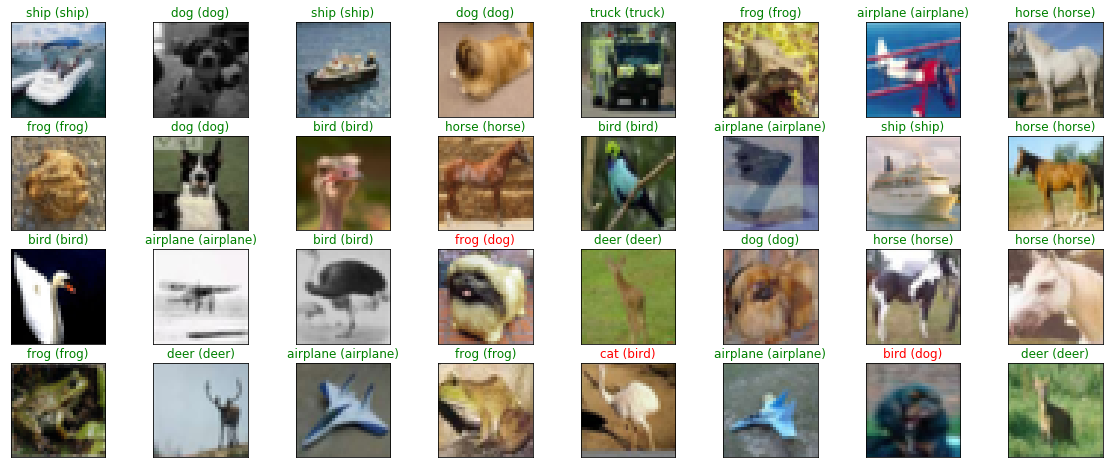

In [0]:
# plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test_norm.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test_ori[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx=y_test_ori[idx][0]
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho


### 10. Verificar a presença de overfitting ou underfitting durante o treinamento

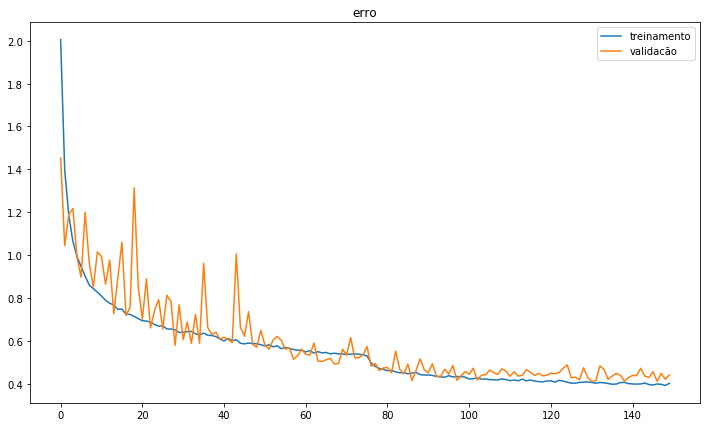

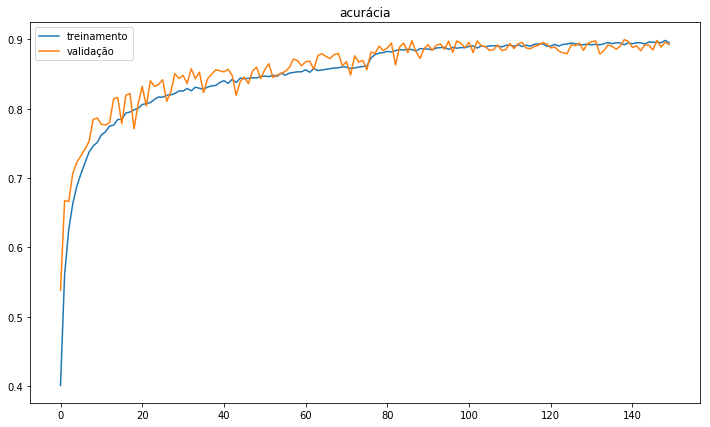

In [0]:
plt.figure(figsize=(12,7))
plt.plot(hist.epoch,hist.history['loss'], label='treinamento')
plt.plot(hist.epoch,hist.history['val_loss'], label='validacão')
plt.title('erro')
plt.legend(loc='best')

plt.figure(figsize=(12,7))
plt.plot(hist.epoch,hist.history['acc'], label='treinamento')
plt.plot(hist.epoch,hist.history['val_acc'], label='validação')
plt.title('acurácia')
plt.legend(loc='best')

<br>
### A partir dos gráficos acima que mostram o comportamento do erro/perda nas amostras de treinamento e validação e o gráfico que mostra a acurácia nas mesmas amostras percebe-se:
* O comportamento do erro é similar na amostra de treinamento e na de validação
* A mesma observação pode ser percebida em relação a acurácia. 
<br>
### Pelas observações mencionadas acima, não há indícios de overfitting no modelo.
<br>
### Percebe-se que há um underfitting claro até a época 80, sendo que após esse marco há uma evolução muito pequena na acurácia e na diminuição do erro/perda
<br>
<br>


### 11. Ações para melhorar a acurácia do modelo

* Como a rede ainda não atingiu um estágio de overfitting, ela poderia ser treinada utilizando-se mais épocas

* Os cálculos de learning_rate poderia ser ajustados para acelerar as melhoras das taxas de queda do erro e aumento da acurácia em função da época de treinamento

* A rede poderia ter sido testada com uma quantidade maior de camadas convolucionais

* Outras arquiteturas de redes convolucionais, tais como a ResNet, VGG, GoogleNet/Inception, poderiam ter sido testadas.

* Utilização de ensemble de modelos para compor fortalezas de várias arquiteturas na análise de uma imagem



### 12. Possíveis aplicações desse modelo

O modelo poderia ser utilizada para aplicações que dependem da identificação de entidades em uma imagem para a tomada de decisão ou realização de alguma ação correspondente. Pode-se citar como exemplo:

* Um dos grupos da turma propõe a identificação de pragas em lavouras para a pulverização de agrotóxico correto na quantidade ideal, para tanto, o modelo desse exercício poderia ser treinado para identificação do tipo de praga possível em uma lavoura e, a partir da análise da imagem obtida por um drone em sobrevôo da lavoura, indicar qual a praga presente e instruir o drone a voltar a base para se abastecer do agrotóxico correto na quantidade correspondente e pulverizar apenas a região que apresenta a praga. 

* Outra possibilidade seria a utilização desse modelo para a aplicação proposta no trabalho de IOT e Robótica que previa uma solução de controle inteligente de tráfego em uma cidade, para isso, haveria uma câmera com capacidade de identificação do número e tipo de  veículos em uma dada via da região, e a partir do recebimento dessas informações por um sistema central, iria calcular a melhor tempo de abertura para os semáforos. Para os tipos de veículos, uma rede dessa natureza seria salutar, pois seria treinada para distinguir entre veículos de ambulância, veículos do corpo de bombeiros, polícia, etc. que interferem na decisão dos tempos estabelecidos para os semáforos.